In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, Latex

path = "/home/ahpqmiranda/Codes/Pycharm/ufpa_materiais/ufpa_materiais/6 Elementos de Máquinas 1/trabalho de análise de molas/sources"

In [2]:
# medidas do diâmetro externo
d_ext = [44.40, 44.33, 44.35, 44.42, 44.40]
d_int = [37.80, 37.87, 37.82, 37.79, 37.77]
d_fio = [2.51, 2.53, 2.49, 2.51, 2.50]
index = [str(f't{i}') for i in range(1, 6)]
meds = pd.DataFrame({
    'd_ext (mm)': [round(i, ndigits=2) for i in d_ext],
    'd_int (mm)': [round(i, ndigits=2) for i in d_int],
    'd_fio (mm)': [round(i, ndigits=2) for i in d_fio]
}, index=index)
meds

,d_ext (mm),d_int (mm),d_fio (mm)
t1,44.40,37.80,2.51
t2,44.33,37.87,2.53
t3,44.35,37.82,2.49
t4,44.42,37.79,2.51
t5,44.40,37.77,2.50


In [3]:
meds.to_csv(f'{path}/medidas.csv', index=True)

In [4]:
meds.to_latex(caption='Medidas do diâmetro externo, interno e do fio', buf=f'{path}/medidas.tex', label='tab:medidas', index=True, column_format='c|c|c', float_format='%.2f')

In [5]:
#  massas e metragens
# foram utilizados 10 pesos de 400g 
mass = [round(0.4 * i, ndigits=3) for i in range(1, 11)]
mass = np.array(mass)
# as respectivas medidas foram tomadas com a régua milimetrada 
metr = [25.1, 25.6, 26, 26.4, 26.9, 27.4, 27.8, 28.3, 28.7, 29.2]
metr = np.array(metr)

incerteza = 0.5 # 0.5mm de precisão
g = 9.8 # m/s^2

force = mass * g
index = [str(f't{i}') for i in range(1, 11)]

data = pd.DataFrame({'peso (N)': force, 'deslocamento (mm)': metr, 'incerteza (cm)': incerteza})
data.index = index
data

,peso (N),deslocamento (mm),incerteza (cm)
t1,3.92,25.1,0.5
t2,7.84,25.6,0.5
t3,11.76,26.0,0.5
t4,15.68,26.4,0.5
t5,19.60,26.9,0.5
t6,23.52,27.4,0.5
t7,27.44,27.8,0.5
t8,31.36,28.3,0.5
t9,35.28,28.7,0.5
t10,39.20,29.2,0.5


In [6]:
data.to_latex(caption='peso e deslocamento', buf=f'{path}/data.tex', label='tab:data', index=True, column_format='c|c|c')

In [7]:
percentis = [.25, .5, .75]
percen = data.quantile(percentis)
percen

,peso (N),deslocamento (mm),incerteza (cm)
0.25,12.74,26.100,0.5
0.50,21.56,27.150,0.5
0.75,30.38,28.175,0.5


In [8]:
# desvio padrão
std = np.std(metr)
print(f'Desvio padrão: {std}')

Desvio padrão: 1.3024592124131946


In [9]:
#  regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [10]:
#  regressão linear
reg = LinearRegression().fit(force.reshape(-1, 1), metr)
#  coeficientes
reg.coef_, reg.intercept_

(array([0.11564626]), 24.646666666666665)

Coeficiente de determinação: 0.9994498152951348


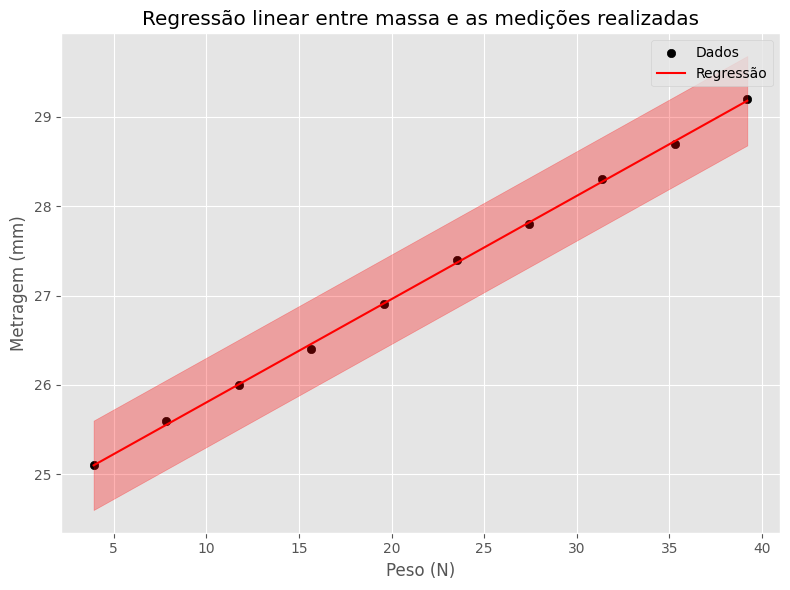

In [11]:
y_est = reg.predict(force.reshape(-1, 1))

#  coeficiente de determinação
r2_score(metr, reg.predict(force.reshape(-1, 1)))
print(f'Coeficiente de determinação: {r2_score(metr, reg.predict(force.reshape(-1, 1)))}')
#  plotagem
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.subplots(figsize=(8, 6))
plt.scatter(force, metr, color='black', label='Dados')
plt.plot(force, y_est, color='red', label='Regressão')
plt.xlabel('Peso (N)')
plt.ylabel('Metragem (mm)')
plt.legend()
plt.fill_between(force, y_est - incerteza, y_est + incerteza, alpha=0.3, color='red', label='Incerteza')
plt.title('Regressão linear entre massa e as medições realizadas')
plt.tight_layout()

plt.savefig('out/regressao.png', dpi=300)
plt.show()


In [12]:
#  Cálculo da constante elástica da mola - teórico
from sympy import symbols, Eq, solve
k, D, d, N, G = symbols('K D d N G')

vals = {D: 0.011, d: 0.0025, N: 18, G: 0.0000000008}



In [13]:
Latex()

<IPython.core.display.Latex object>